# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})



# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# # a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

2024-03-16 10:18:36.659083: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-16 10:18:36.659103: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-16 10:18:36.659107: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-16 10:18:36.659141: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-16 10:18:36.659153: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Compute cmb lensing

In [39]:
%%time 
Mclass = Class()
# M.set(ksz_params)
# M.set(common_params)
Mclass.set(cosmo_params)
Mclass.set({
    'output': 'tCl,lCl',
    'l_max_scalars':10000.,

 'ell_max': 20000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.0001,
#  'mass_epsabs': 1e-40,
#  'mass_epsrel': 0.0001,
    
# 'M_min':1e8,
# 'M_max':1e+17,
'z_min':1e-5,
'z_max': 25.,
    
# # 'k_min_for_pk_class_sz' : 1e-4,
# # 'k_max_for_pk_class_sz' : 5e1,
# # 'k_per_decade_class_sz' : 20.,
# # 'P_k_max_h/Mpc' : 200.0,

    
# 'ndim_masses' : 150, # important 128 is default ccl value
# 'ndim_redshifts' : 150,
'non_linear':'halofit',
'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
    
# 'hm_consistency': 1,
'lensing':'yes',
'modes':'s',
'overwrite_clpp_with_limber' : 0,
})
# M.compute_class_szfast()
Mclass.compute()

CPU times: user 1min 47s, sys: 17.6 s, total: 2min 5s
Wall time: 48.8 s


In [40]:
cl_kk = Mclass.cl_kk
# cl_kk()

In [74]:
%%time 
M = Class()
# M.set(ksz_params)
# M.set(common_params)
M.set(cosmo_params)
M.set({
    'output': 'lens_lens_1h,lens_lens_2h,lens_lens_hf',
    # 'l_max_scalars':10000.,

"mass function":"T08M200c",
 'ell_max': 60000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.00001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.00001,
    
'M_min':2e9, ## min mass shouldnt be too low; the high-ell regime is dominated by consistency condition
'M_max':1e+17,
'z_min':1e-5,
'z_max': 35.,
    
'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 200.0,

    
'ndim_masses' : 150, # important 128 is default ccl value
'ndim_redshifts' : 150,
'non_linear':'halofit',
'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
    
'hm_consistency': 0,
"hmf_apply_zthreshold_to_hmf_and_bias":1,


})
# M.compute_class_szfast()
M.compute()
cl_kk_hm = M.cl_kk

CPU times: user 36.8 s, sys: 92.4 ms, total: 36.9 s
Wall time: 5.42 s


/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_37984/2288507539.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


(2e-13, 1e-06)

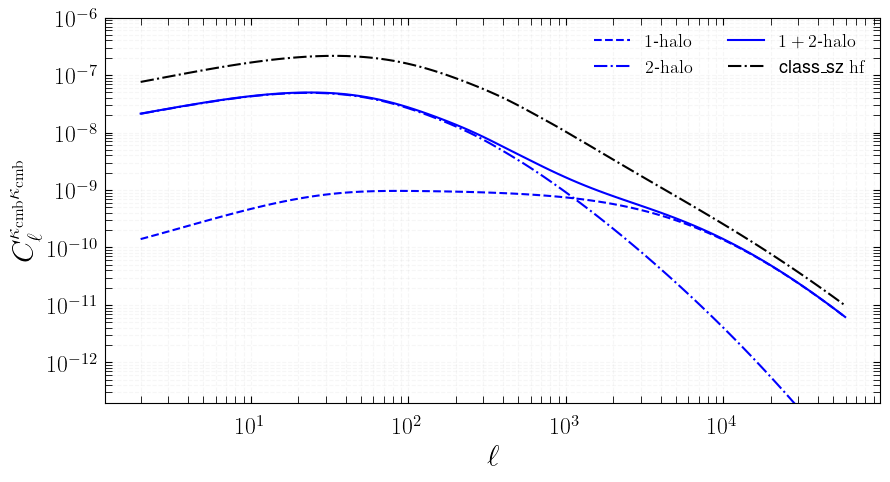

In [75]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk_hm()['ell'])
fac = ell*(ell+1.)/2./np.pi
cl_kk_1h = np.asarray(cl_kk_hm()['1h'])
cl_kk_2h = np.asarray(cl_kk_hm()['2h'])
cl_kk_hf = np.asarray(cl_kk_hm()['hf'])

# # ell = np.asarray(cl_gg()['ell'])
# cl_km_1h = np.asarray(cl_km()['1h'])
# cl_km_2h = np.asarray(cl_km()['2h'])

ax.plot(ell,cl_kk_1h/fac,ls='--',c='b',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac,ls='-.',c='b',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac+cl_kk_1h/fac,ls='-',c='b',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_hf/fac,ls='-.',c='k',label=r'class_sz $\mathrm{hf}$')
# M.raw_cl()['ell']
# M.raw_cl()['pp']

# class_cls, = ax.plot(Mclass.lensed_cl()['ell'],
#                      Mclass.lensed_cl()['pp']*(Mclass.lensed_cl()['ell']*(Mclass.lensed_cl()['ell']+1.)/2.)**2.,
#                      ls=':',c='r',label=r'class Halofit')


plt.legend(frameon=True,framealpha=0,ncol=2,fontsize=13,loc=1)

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_xlim(2e0,2.e4)
ax.set_ylim(2e-13,1.e-6)
# plt.savefig(path_to_kSZ2X_2022+'clkk_so_s4.pdf')

In [76]:
%%time 
M = Class()
# M.set(ksz_params)
# M.set(common_params)
M.set(cosmo_params)
M.set({
    'output': 'lens_lens_1h,lens_lens_2h,lens_lens_hf',
    # 'l_max_scalars':10000.,

"mass function":"T08M200c",
 'ell_max': 60000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.00001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.00001,
    
'M_min':2e9, ## min mass shouldnt be too low; the high-ell regime is dominated by consistency condition
'M_max':1e+17,
'z_min':1e-5,
'z_max': 35.,
    
'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 200.0,

    
'ndim_masses' : 150, # important 128 is default ccl value
'ndim_redshifts' : 150,
'non_linear':'halofit',
'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
    
'hm_consistency': 1,
"hmf_apply_zthreshold_to_hmf_and_bias":1,


})
# M.compute_class_szfast()
M.compute()
cl_kk_hm = M.cl_kk

CPU times: user 36.6 s, sys: 83.7 ms, total: 36.7 s
Wall time: 5.42 s


/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_37984/2288507539.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


(2e-13, 1e-06)

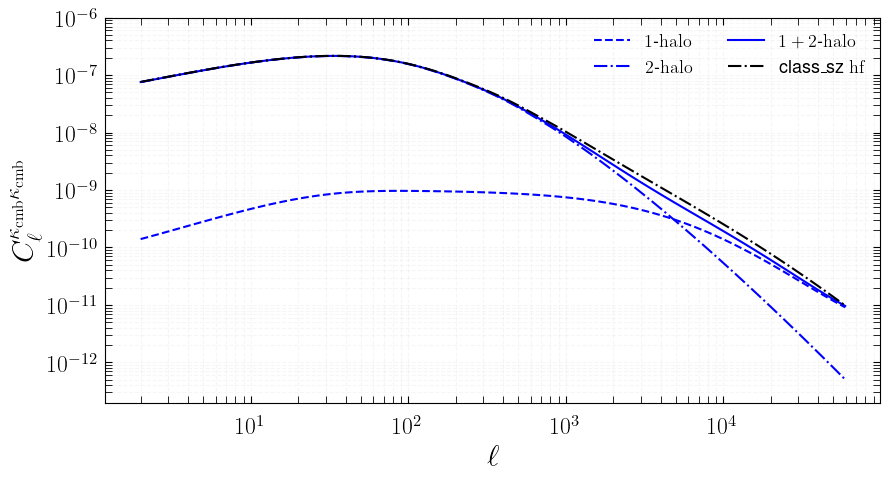

In [77]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk_hm()['ell'])
fac = ell*(ell+1.)/2./np.pi
cl_kk_1h = np.asarray(cl_kk_hm()['1h'])
cl_kk_2h = np.asarray(cl_kk_hm()['2h'])
cl_kk_hf = np.asarray(cl_kk_hm()['hf'])

# # ell = np.asarray(cl_gg()['ell'])
# cl_km_1h = np.asarray(cl_km()['1h'])
# cl_km_2h = np.asarray(cl_km()['2h'])

ax.plot(ell,cl_kk_1h/fac,ls='--',c='b',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac,ls='-.',c='b',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac+cl_kk_1h/fac,ls='-',c='b',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_hf/fac,ls='-.',c='k',label=r'class_sz $\mathrm{hf}$')
# M.raw_cl()['ell']
# M.raw_cl()['pp']

# class_cls, = ax.plot(Mclass.lensed_cl()['ell'],
#                      Mclass.lensed_cl()['pp']*(Mclass.lensed_cl()['ell']*(Mclass.lensed_cl()['ell']+1.)/2.)**2.,
#                      ls=':',c='r',label=r'class Halofit')


plt.legend(frameon=True,framealpha=0,ncol=2,fontsize=13,loc=1)

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_xlim(2e0,2.e4)
ax.set_ylim(2e-13,1.e-6)
# plt.savefig(path_to_kSZ2X_2022+'clkk_so_s4.pdf')

In [71]:
# l,cl = np.loadtxt("/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/output/test_cpp.txt",unpack=True)
# plt.plot(l,cl)
# plt.loglog()

/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_37984/335291184.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


(2.0, 65000)

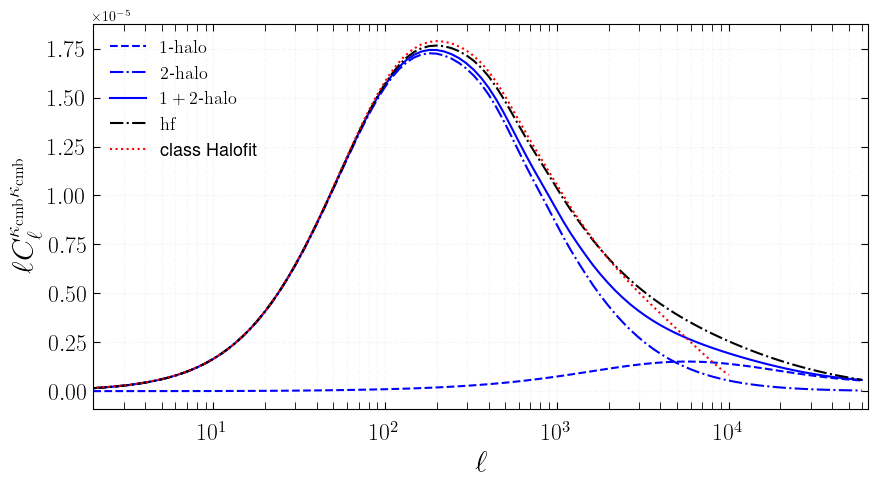

In [72]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$\ell C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk_hm()['ell'])
fac = ell*(ell+1.)/2./np.pi
cl_kk_1h = np.asarray(cl_kk_hm()['1h'])
cl_kk_2h = np.asarray(cl_kk_hm()['2h'])
# cl_kk_hf = np.asarray(cl_kk_hm()['hf'])

# # ell = np.asarray(cl_gg()['ell'])
# cl_km_1h = np.asarray(cl_km()['1h'])
# cl_km_2h = np.asarray(cl_km()['2h'])

ax.plot(ell,ell**1*cl_kk_1h/fac,ls='--',c='b',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,ell**1*cl_kk_2h/fac,ls='-.',c='b',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,ell**1*cl_kk_2h/fac+ell*1*cl_kk_1h/fac,ls='-',c='b',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')
ax.plot(ell,ell**1*cl_kk_hf/fac,ls='-.',c='k',label=r'$\mathrm{hf}$')
# M.raw_cl()['ell']
# M.raw_cl()['pp']

class_cls, = ax.plot(Mclass.lensed_cl()['ell'],
                     Mclass.lensed_cl()['ell']*Mclass.lensed_cl()['pp']*(Mclass.lensed_cl()['ell']*(Mclass.lensed_cl()['ell']+1.)/2.)**2.,
                     ls=':',c='r',label=r'class Halofit')


plt.legend(frameon=True,framealpha=0,ncol=1,fontsize=13,loc=2)

ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlim(2e0,65000)
# ax.set_ylim(2e-11,1.e-6)
# plt.savefig(path_to_kSZ2X_2022+'clkk_so_s4.pdf')

# Halo-model plots

In [34]:
%%time 

z_for_pk_hm = 1.1
M = Class()
# M.set(ksz_params)
# M.set(common_params)
M.set(cosmo_params)
M.set({
'output': 'lens_lens_1h,lens_lens_2h,lens_lens_hf,tCl,lCl,pk_at_z_1h,pk_at_z_2h',
    
    
"mass function":"T08M200c",
'x_out_truncated_nfw_profile' : 1.,
# 'delta for matter density' : 'vir',
# 'T10_alpha_fixed' : 1,

'ell_max': 30000.0,
'ell_min': 2.0,
'dlogell': 0.1,
'dell': 0,
'redshift_epsrel': 0.0001,
'mass_epsabs': 1e-40,
'mass_epsrel': 0.0001,
    
'M_min':1e10,
'M_max':1e+17,
'z_min':1e-5,
'z_max': 35.,
    
'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 200.0,

    
'ndim_masses' : 250, # important 128 is default ccl value
'ndim_redshifts' : 550,
'non_linear':'halofit',
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
    
'hm_consistency': 1,
'damping_1h_term': 0,
    
    
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 1e2,
    
'lensing':'yes',
'modes':'s',
'overwrite_clpp_with_limber' : 0,
"hmf_apply_zthreshold_to_hmf_and_bias":0,

})
M.compute()

cl_kk = M.cl_kk

CPU times: user 4min 24s, sys: 619 ms, total: 4min 25s
Wall time: 29.3 s


In [35]:
pk_hm_2h = np.asarray(M.pk_at_z_hm()['2h'])

In [36]:
pk_hm_2h

array([1.31455641e+03, 1.44281459e+03, 1.58264557e+03, 1.73485221e+03,
       1.90022155e+03, 2.07954467e+03, 2.27355235e+03, 2.48290267e+03,
       2.70815331e+03, 2.94972819e+03, 3.20787740e+03, 3.48263323e+03,
       3.77376099e+03, 4.08069927e+03, 4.40249280e+03, 4.73772955e+03,
       5.08445876e+03, 5.44013251e+03, 5.80149378e+03, 6.16449343e+03,
       6.52418805e+03, 6.87468982e+03, 7.20910997e+03, 7.51952081e+03,
       7.79686823e+03, 8.03116063e+03, 8.21173736e+03, 8.32752727e+03,
       8.36739583e+03, 8.32100784e+03, 8.18011379e+03, 7.94043815e+03,
       7.60343577e+03, 7.17763079e+03, 6.68062876e+03, 6.13904317e+03,
       5.58676652e+03, 5.06068030e+03, 4.59389841e+03, 4.20730791e+03,
       3.90086471e+03, 3.64719662e+03, 3.39326164e+03, 3.07985838e+03,
       2.68173469e+03, 2.24323174e+03, 1.86196600e+03, 1.61122048e+03,
       1.46571431e+03, 1.31042735e+03, 1.07966852e+03, 8.66427978e+02,
       7.53456079e+02, 6.57833746e+02, 5.25269791e+02, 4.39526295e+02,
      

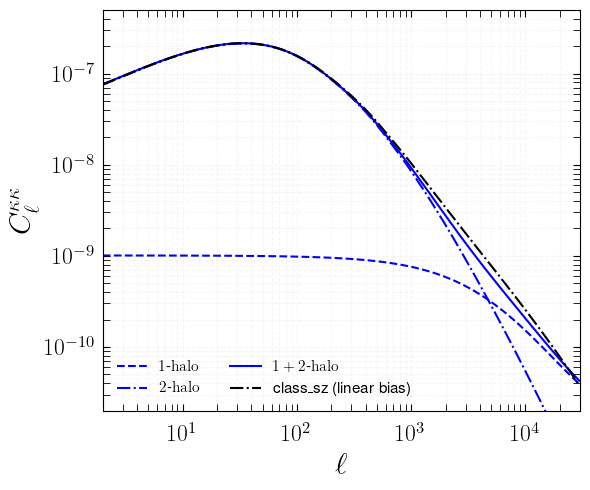

In [37]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(6,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa\kappa}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk()['ell'])
fac = ell*(ell+1.)/2./np.pi
cl_kk_1h = np.asarray(cl_kk()['1h'])
cl_kk_2h = np.asarray(cl_kk()['2h'])
cl_kk_hf = np.asarray(cl_kk()['hf'])

# # ell = np.asarray(cl_gg()['ell'])
# cl_km_1h = np.asarray(cl_km()['1h'])
# cl_km_2h = np.asarray(cl_km()['2h'])

ax.plot(ell,cl_kk_1h/fac,ls='--',c='b',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac,ls='-.',c='b',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac+cl_kk_1h/fac,ls='-',c='b',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_hf/fac,ls='-.',c='k',label=r'class_sz (linear bias)')
# M.raw_cl()['ell']
# M.raw_cl()['pp']

# class_cls, = ax.plot(M.lensed_cl()['ell'],
#                      M.lensed_cl()['pp']*(M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2.)**2.,
#                      ls=':',c='r',label=r'class hmcode')


plt.legend(frameon=True,framealpha=0,ncol=2,fontsize=11,loc=3)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(2e0,3.e4)
ax.set_ylim(2e-11,5.e-7)
fig.tight_layout()
plt.savefig('figures/clkk_halomdel.png',dpi=300)

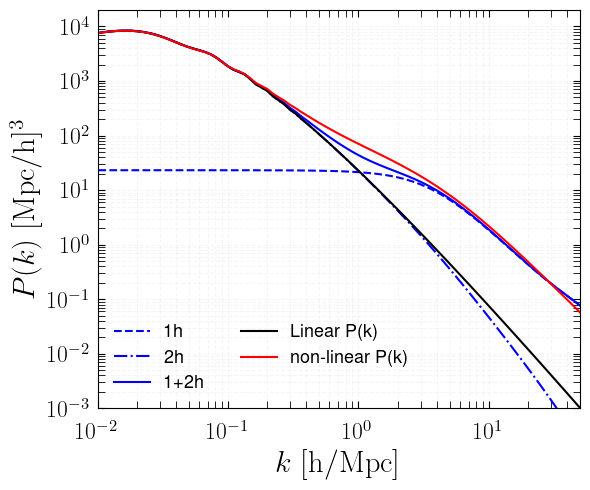

In [38]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax) = plt.subplots(1,1,figsize=(6,5))
khm = np.asarray(M.pk_at_z_hm()['k'])
pk_hm_1h = np.asarray(M.pk_at_z_hm()['1h'])
pk_hm_2h = np.asarray(M.pk_at_z_hm()['2h'])

z = z_for_pk_hm
pk1_lin_fast = np.vectorize(M.pk_lin)(khm*M.h(),z)*M.h()**3
pk1_nonlin_fast = np.vectorize(M.pk)(khm*M.h(),z)*M.h()**3

plt.plot(khm,pk_hm_1h,c='b',ls='--',label='1h')
plt.plot(khm,pk_hm_2h,c='b',ls='-.',label='2h')
plt.plot(khm,pk_hm_1h+pk_hm_2h,c='b',ls='-',label='1+2h')

plt.plot(khm,pk1_lin_fast,c='k',label='Linear P(k)')
plt.plot(khm,pk1_nonlin_fast,c='r',label='non-linear P(k)')


plt.legend(frameon=True,framealpha=0,ncol=2,fontsize=13,loc=3)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-2,5.e1)
ax.set_ylim(1e-3,2e4)

ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_xlabel(r"$k$  $\mathrm{[h/Mpc]}$",size=title_size)
ax.set_ylabel(r"$P(k)$  $\mathrm{[Mpc/h]^3}$",size=title_size)
fig.tight_layout()
# plt.savefig('figures/pk_halomdel.png',dpi=300)